## PyLab 1

Jeff Shen | 1004911526

Stacy Ossipov | 1004877779

27 January 2020

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
# read data (using dataframe because it's easier)
data = pd.read_csv('data2.csv')

# convert current and uncertainty from mA to A
data.current /= 1000
data.ucurrent /= 1000

In [3]:
# reduced chi squared
def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

# fit function
def model(x, a, b):
    return a*x + b

# fit function where line passes through 0
def model2(x, a):
    return a*x

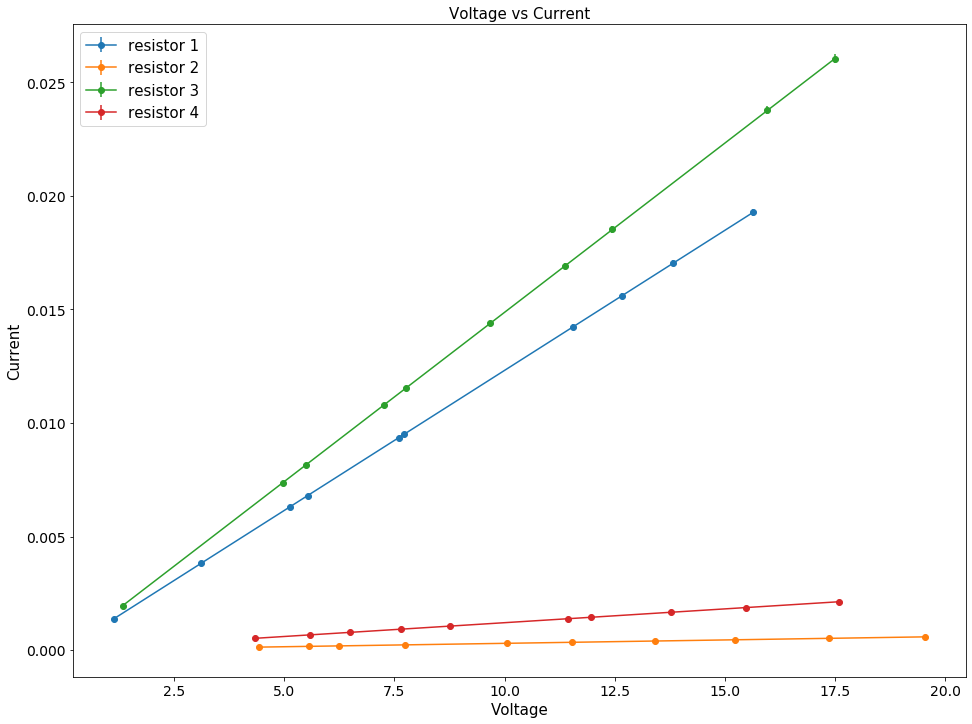

In [4]:
# making plot bigger
plt.figure(figsize=(16, 12))
# initializing array to store output 
params = np.zeros((4, 8))

# loop over all resistors
for i in np.unique(data.resistorid):
    # filter data for this resistor
    current = data[data.resistorid == i].current 
    voltage = data[data.resistorid == i].voltage
    ucurrent = data[data.resistorid == i].ucurrent
    uvoltage = data[data.resistorid == i].uvoltage
    
    # fit curve
    popt, pcov = curve_fit(f=model, xdata=voltage, ydata=current, sigma=ucurrent, absolute_sigma=True, p0=(1, 1))
    # plot results of fit with error bars 
    plt.errorbar(voltage, model(voltage, *popt), yerr=ucurrent, marker='o', ls='-', label=f'resistor {i}')
    
    # second fit, forcing line to pass through 0. not plotting, just getting answers for questions.
    popt2, pcov2 = curve_fit(f=model2, xdata=voltage, ydata=current, sigma=ucurrent, absolute_sigma=True, p0=(1))
    
    # store output parameters in array
    params[i-1] = (i, popt[1], np.sqrt(np.diag(pcov)[1]), rcs(model(voltage, *popt), current, ucurrent, 2), 1/popt[0], np.sqrt(np.diag(pcov)[0])/np.square(popt[0]), 1/popt2[0], np.sqrt(np.diag(pcov2)[0])/np.square(popt2[0]))

# plot stuff
plt.legend(fontsize=15);
plt.title('Voltage vs Current', fontsize=15)
plt.xlabel('Voltage', fontsize=15)
plt.ylabel('Current', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('plot.png')

In [5]:
# put parameters into dataframe because it looks nicer
params = pd.DataFrame(params)
# add labels to columns
params.columns = ['resistor_id', 'fit intercept', 'intercept error', 'reduced chi squared', 'resistance', 'resistance error', 'resistance (forced through 0)', 'resistance error (forced through 0)']
params

,resistor_id,fit intercept,intercept error,reduced chi squared,resistance,resistance error,resistance (forced through 0),resistance error (forced through 0)
0,1.0,-1.174579e-05,0.000012,0.115313,811.053336,2.592638,812.727682,1.927563
1,2.0,5.383516e-07,0.000001,1.070705,33454.156824,178.852048,33386.250926,79.184394
2,3.0,-2.253287e-05,0.000018,0.268037,671.273711,2.150820,673.111334,1.596440
3,4.0,-5.938997e-06,0.000005,0.202627,8232.651096,46.704861,8280.273887,19.638552


In [6]:
# calculate resistances and uncertainties
data['resistance'] = data.voltage / data.current
data['uresistance'] = np.sqrt(np.square(data.uvoltage / data.voltage) + np.square(data.ucurrent / data.current)) * data.resistance
data

,current,ucurrent,voltage,uvoltage,resistorid,resistance,uresistance
0,0.001373,1.029750e-05,1.122,0.002805,1,817.188638,6.460443
1,0.003810,2.857500e-05,3.110,0.007775,1,816.272966,6.453204
2,0.006300,4.725000e-05,5.120,0.012800,1,812.698413,6.424945
3,0.006820,5.115000e-05,5.530,0.013825,1,810.850440,6.410336
4,0.009360,7.020000e-05,7.600,0.019000,1,811.965812,6.419153
5,0.009490,7.117500e-05,7.720,0.019300,1,813.487882,6.431186
6,0.014220,1.066500e-04,11.560,0.028900,1,812.939522,6.426851
7,0.015570,1.167750e-04,12.670,0.031675,1,813.744380,6.433214
8,0.017070,1.280250e-04,13.830,0.034575,1,810.193322,6.405141
9,0.019360,1.452000e-04,15.640,0.039100,1,807.851240,6.386625


In [24]:
for i, j in zip(data.resistance.to_numpy(), data.uresistance.to_numpy()):
    print(f'{i:.2f} +/- {j:.2f}')

817.19 +/- 6.46
816.27 +/- 6.45
812.70 +/- 6.42
810.85 +/- 6.41
811.97 +/- 6.42
813.49 +/- 6.43
812.94 +/- 6.43
813.74 +/- 6.43
810.19 +/- 6.41
807.85 +/- 6.39
33740.46 +/- 266.74
32764.71 +/- 259.03
33315.51 +/- 263.38
33362.07 +/- 263.75
33421.93 +/- 264.22
33449.28 +/- 264.44
33441.40 +/- 264.38
33399.12 +/- 264.04
33532.82 +/- 265.10
33418.80 +/- 264.20
678.57 +/- 5.36
675.75 +/- 5.34
669.10 +/- 5.29
675.02 +/- 5.34
674.78 +/- 5.33
673.87 +/- 5.33
673.77 +/- 5.33
671.16 +/- 5.31
671.01 +/- 5.30
667.94 +/- 5.28
8378.38 +/- 66.24
8266.67 +/- 65.35
8267.52 +/- 65.36
8261.34 +/- 65.31
8273.58 +/- 65.41
8270.62 +/- 65.39
8266.57 +/- 65.35
8271.31 +/- 65.39
8282.50 +/- 65.48
8262.91 +/- 65.32
